In [ ]:
#convert this so that it works in spyder

In [1]:
from sklearn.datasets import fetch_mldata

In [2]:
mnist = fetch_mldata('MNIST original')

In [3]:
mnist

{'COL_NAMES': ['label', 'data'],
 'DESCR': 'mldata.org dataset: mnist-original',
 'data': array([[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ..., 
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]], dtype=uint8),
 'target': array([ 0.,  0.,  0., ...,  9.,  9.,  9.])}

In [4]:
#DESCAR -> KEY DESCRIBING THE DATASET

#DATA -> KEY CONTAINING AN ARRAY WITH ONE ROW PER INSTANCE AND ONE COLUMN PER FEATURE

#TARGET -> KEY CONTAINING AN ARRAY WITH THE LABELS

In [5]:
X, y = mnist["data"], mnist["target"]

In [6]:
X.shape

(70000L, 784L)

In [7]:
y.shape

(70000L,)

In [8]:
#70000 images with 784 features
    #each image is 28x28 pixels from 0 to 255 RGB

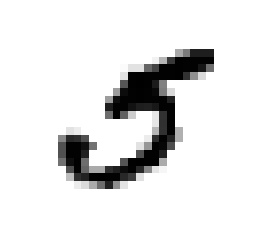

In [9]:
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt

some_digit = X[36000]
some_digit_image = some_digit.reshape(28, 28)
plt.imshow(some_digit_image, cmap = matplotlib.cm.binary, interpolation="nearest")
plt.axis("off")
plt.show()

In [10]:
y[36000]

5.0

In [11]:
X_train, X_test, y_train, y_test = X[:60000], X[60000:], y[:60000], y[60000:]

In [12]:
#By shuffling the datasets it ensures the preformance of
    #the algorithms preforms well regardless of the order of training
    
import numpy as np
shuffle_index  = np.random.permutation(60000)
X_train, y_train = X_train[shuffle_index], y_train[shuffle_index]

In [13]:
#Binary classifier (5 and not 5)
#target vectors for classification

y_train_5 = (y_train == 5)   #true for any 5 but not for any other digits
y_test_5 = (y_test == 5)

In [14]:
#SGD or Stochastic Gradient Descent --classifier handles large datasets efficient
        #trains instances independently

        #SGD relies on random parameter 
        
from sklearn.linear_model import SGDClassifier
sgd_clf = SGDClassifier(random_state=42)
sgd_clf.fit(X_train, y_train_5)

SGDClassifier(alpha=0.0001, average=False, class_weight=None, epsilon=0.1,
       eta0=0.0, fit_intercept=True, l1_ratio=0.15,
       learning_rate='optimal', loss='hinge', n_iter=5, n_jobs=1,
       penalty='l2', power_t=0.5, random_state=42, shuffle=True, verbose=0,
       warm_start=False)

In [15]:
sgd_clf.predict([some_digit])

array([False], dtype=bool)

In [16]:
#Evaluating a Classifier is more difficult than evaluating a Regressor

In [16]:
#Implemmentation of cross-validation to evaluate the mode

from sklearn.model_selection import StratifiedKFold
from sklearn.base import clone

skfolds = StratifiedKFold(n_splits=3, random_state=42)

for train_index, test_index in skfolds.split(X_train, y_train_5):
    clone_clf = clone(sgd_clf)
    X_train_folds = X_train[train_index]
    y_train_folds = (y_train_5[train_index])
    X_test_fold = X_train[test_index]
    y_test_fold = (y_train_5[test_index])

    clone_clf.fit(X_train_folds, y_train_folds)
    y_pred = clone_clf.predict(X_test_fold)
    n_correct = sum(y_pred == y_test_fold)
    print(n_correct / len(y_pred))     #this is sappoused to print 0.9502, 0.96565, 0.06495
    
    #probably an integer devision issue with the numbers
    
#This preforms stratified sampling to produce folds with a ratio of each class
    #creates a clone of the classifier, trains it on training folds then makes
    #a predictionon the test fold. outputs ratio of correct predictions

0
0
0


In [17]:
from sklearn.model_selection import cross_val_score
cross_val_score(sgd_clf, X_train, y_train_5, cv=3, scoring="accuracy")

array([ 0.95295,  0.9542 ,  0.96825])

In [18]:
#This classifier classifies every image as "not 5"
    #it accuracy will give 90% because it only misses
    #the 10% that are 5's

from sklearn.base import BaseEstimator

class Never5Classifier(BaseEstimator):
    def fit(self, X, y = None):
        pass
    def predict(self, X):
        return np.zeros((len(X), 1), dtype =bool)
    
    #   see below
    

In [19]:
never_5_clf = Never5Classifier()
cross_val_score(never_5_clf, X_train, y_train_5, cv=3, scoring="accuracy")

array([ 0.91065,  0.90705,  0.91125])

In [22]:
#accuracy is generally not the preferred performance measure for classification

In [20]:
#use a confusion matrix to find where it confused images of class 5 with another class 

#need a set of predictions for comparison with 5's --> use cross_val_predict

from sklearn.model_selection import cross_val_predict
y_train_pred = cross_val_predict(sgd_clf, X_train, y_train_5, cv=3)

In [24]:
#this preforms K-fold cross-validation returns clean predictions on each fold not evaluation scores

In [21]:
#pass the confusion matrix the target classes below

from sklearn.metrics import confusion_matrix
confusion_matrix(y_train_5, y_train_pred)

array([[53011,  1568],
       [  924,  4497]])

In [26]:
#one good concise metric is the acc of positive predictions (precision of the classifier)
#TP = true positives, FP = false positives

#PRECISION =
#       TP
#   ____________
#      TP+FP


#Also need another metric called recall (sensitivity or true positive rate TPR) 
#FN = false negatives

#RECAL =
#      TP
#   ____________
#     TP+FN

#SEE PICTURE IN BOOK 

In [23]:
from sklearn.metrics import precision_score, recall_score

In [24]:
precision_score(y_train_5, y_train_pred)
#precision evaluation

0.74146743610882115

In [25]:
recall_score(y_train_5, y_train_pred)
#recall metric

0.82955174322080794

In [26]:
#Harmonic mean of precision and recall
        #the score of how good precision and recall are together
from sklearn.metrics import f1_score
f1_score(y_train_5, y_train_pred)

0.78304022288002784

In [27]:
#call decision_function which returns a score for each instance
        #and then make predictions based on those scores
    
y_scores = sgd_clf.decision_function([some_digit])


In [28]:
y_scores

array([-81405.3816109])

In [29]:
#this value can be changed but challenge the thought: for 99% precision what is the cost to recall?
threshold = 0
y_some_digit_pred = (y_scores > threshold)

In [30]:
y_some_digit_pred

array([False], dtype=bool)

In [35]:
#Therefore.
#raising the threshold decreases recall, the issue now becomes 
        #which threshold to choose from?

#gather scores of all instances in training set with cross_val_predict
#specify a return for decision scores not predictions

In [31]:
y_scores = cross_val_predict(sgd_clf, X_train, y_train_5, cv=3,
                                method="decision_function")

In [32]:
#using these scores compute precision and recall for all possible thresholds

from sklearn.metrics import precision_recall_curve

precisions, recalls, thresholds = precision_recall_curve(y_train_5, y_scores)

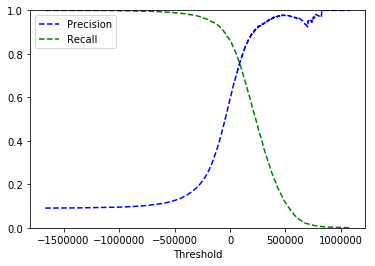

In [38]:
#now Plot

def plot_precision_recall_vs_threshold(precisions, recalls, thresholds):
    plt.plot(thresholds, precisions[:-1], "b--", label="Precision")
    plt.plot(thresholds, recalls[:-1], "g--", label="Recall")
    plt.xlabel("Threshold")
    plt.legend(loc="upper left")
    plt.ylim([0,1])
    #plt.xlim([-700000, 700000])

plot_precision_recall_vs_threshold(precisions, recalls, thresholds)
#plt.show()

In [39]:
#ROC - Receiver Operating Characteristic: plots sensivitity vs (1 - specificity)
##or true positive rate against false positive rate
        #need FPR - false positve ratio and TNR true negative ratio


In [33]:
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_train_5, y_scores)

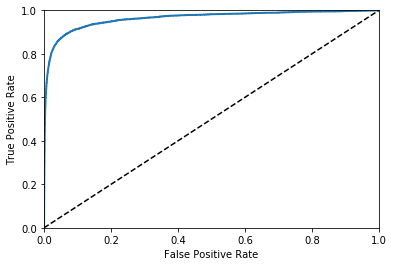

In [39]:
def plot_roc_curve(fpr, tpr, label=None):
    plt.plot(fpr, tpr, linewidth=2, label=label)
    plt.plot([0,1], [0,1], 'k--')
    plt.axis([0,1,0,1])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    
    
plot_roc_curve(fpr, tpr)
plt.show()

In [42]:
#test to compare classifiers is to measure the area under the curve AUC
    #Where ROC AUC = 1 and a random one will = 0.5

In [38]:
from sklearn.metrics import roc_auc_score
roc_auc_score(y_train_5, y_scores)

0.96324962447793316

In [44]:
#Train a random forest to compare the ROC and ROC AUC to SGDClassifier
    #predict probability method instead of the decision function

In [35]:
from sklearn.ensemble import RandomForestClassifier

forest_clf = RandomForestClassifier(random_state=42)
y_probas_forest = cross_val_predict(forest_clf, X_train, y_train_5, cv=3,
                                       method="predict_proba")

In [36]:
#need scores not probabiliites
y_scores_forest = y_probas_forest[:, 1]    #score = proba of positive class
fpr_forest, tpr_forest, thresholds_forest = roc_curve(y_train_5, y_scores_forest)

C:\ProgramData\Anaconda2\lib\site-packages\matplotlib\legend.py:326: UserWarning: Unrecognized location "bot right". Falling back on "best"; valid locations are
	right
	center left
	upper right
	lower right
	best
	center
	lower left
	center right
	upper left
	upper center
	lower center

  six.iterkeys(self.codes))))


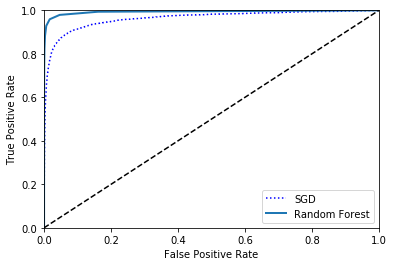

In [40]:
plt.plot(fpr, tpr, "b:", label="SGD")
plot_roc_curve(fpr_forest, tpr_forest, "Random Forest")
plt.legend(loc="bot right")
plt.show()

In [41]:
roc_auc_score(y_train_5, y_scores_forest)

0.99339745231496623

In [49]:
            #What is above
#how to train binary classifiers, choose the appropriate metric for your task,
#evaluate your classifiers using cross-validation, select the precision/recall tradeoff that fits your needs,
#and compare various models using ROC curves and ROC AUC scores.

In [42]:
#binary classification algorithm for a multiclass classification task which runs OvA (one versus all)
sgd_clf.fit(X_train, y_train)     #y_train, not y_train_5
sgd_clf.predict([some_digit])

array([ 0.])

In [53]:
#using y_train is different than y_train_5 which will give 5 versus all
    #this trained 10 binary classifiers, took their decision scores for the image
            #and then selecected the class with the highest score

    #above somewhere we rutnred 1 score per instance
    #below it will return 10 scores 1 per class

In [43]:
some_digit_scores = sgd_clf.decision_function([some_digit])

some_digit_scores

array([[  98291.38724908, -583772.94474473, -248633.16255442,
         -86739.70358226, -340399.80784496,  -81405.3816109 ,
        -815928.92322976, -258545.62483931, -644352.68748056,
        -626041.26102117]])

In [79]:
#get the highest score

np.argmax(some_digit_scores)

0

In [45]:
sgd_clf.classes_

array([ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9.])

In [46]:
sgd_clf.classes_[5]

5.0

In [58]:
#you need to run all 3 of these calls

In [61]:
#call either 1vall or 1v1 classes and pass a binary classifier

In [47]:
#this creates a multiclass classifier using the OvO strategy based on sdg
from sklearn.multiclass import OneVsOneClassifier
ovo_clf = OneVsOneClassifier(SGDClassifier(random_state=42))
ovo_clf.fit(X_train, y_train)
ovo_clf.predict([some_digit])



array([ 5.])

In [48]:
len(ovo_clf.estimators_)


45

In [49]:
#This one trains a Random Forest Classifier

forest_clf.fit(X_train, y_train)
forest_clf.predict([some_digit])

array([ 5.])

In [51]:
#This should say
#array([[ 0.1,  0.,  0.,  0.1,  0.,  0.8,  0.,  0.,  0.,  0.]])
    #Which means that the classifier is 80% confident it is 5, and 10% confident that
    #it is either a 0 or a 3 -->talk to professor about this one
    

    #now working properly
forest_clf.predict_proba([some_digit])   #probabilites assigned to each instance for each class

array([[ 0.1,  0. ,  0. ,  0. ,  0. ,  0.9,  0. ,  0. ,  0. ,  0. ]])

In [52]:
#evaluate the classifiers using cross-val and the sgd's accuracy using cross_val_score
cross_val_score(sgd_clf, X_train, y_train, cv=3, scoring="accuracy")

array([ 0.87232553,  0.85539277,  0.86232935])

In [67]:
#This is roughly 85% on all test folds --> we could scale these inputs to get over 90% 
#read this link on improvements from tensorflow website
# https://rodrigob.github.io/are_we_there_yet/build/classification_datasets_results
#_______________________________________________________________________________________


In [53]:
#This is scaled with standard scaler in preprocessing will return over 90% accuracy
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train.astype(np.float64))
cross_val_score(sgd_clf,X_train_scaled, y_train, cv=3, scoring="accuracy")

array([ 0.90946811,  0.91314566,  0.90738611])

In [69]:
#~Error Analysis~
#There is in Appendix B a checklist that is important for project completion and timeline
    #exploring data preparation options, trying out multi models, shorlisting the best ones and fine-tune hyperparameters
    #using GridSearchCV and automating as much as possible -->see chapter 2

In [54]:
#looking at a confusion matrix lets make predictions using cors val predict
y_train_pred = cross_val_predict(sgd_clf, X_train_scaled, y_train, cv=3)
conf_mx = confusion_matrix(y_train, y_train_pred)
conf_mx

array([[5738,    2,   17,    9,   10,   54,   43,   10,   36,    4],
       [   2, 6495,   42,   27,    5,   38,    6,   11,  103,   13],
       [  63,   39, 5323,  103,   75,   29,   95,   59,  155,   17],
       [  53,   44,  129, 5355,    3,  227,   34,   58,  131,   97],
       [  22,   29,   31,    9, 5345,    9,   51,   35,   81,  230],
       [  69,   49,   29,  190,   71, 4612,  113,   29,  169,   90],
       [  36,   24,   48,    3,   41,   90, 5633,    5,   38,    0],
       [  29,   22,   69,   24,   46,    9,    3, 5807,   17,  239],
       [  53,  165,   65,  166,   15,  151,   55,   28, 5007,  146],
       [  39,   36,   25,   92,  158,   39,    2,  195,   78, 5285]])

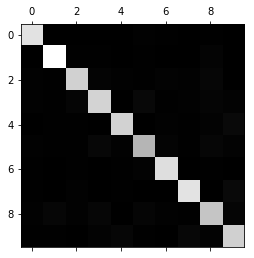

In [58]:
#this is an image representing the matrix using matshow()
plt.matshow(conf_mx, cmap=plt.cm.gray)
plt.show()

In [59]:
#lets look at the errors since the 5th block looks darker
#we know there's either fewer images of 5 or >> just didn't preform well on 5
row_sums = conf_mx.sum(axis=1, keepdims=True)
norm_conf_mx = conf_mx/row_sums

In [60]:
#next will fill the diagonal with zeros(black) and plot the rest
row_sums = conf_mx.sum(axis=1, keepdims=True)



In [61]:
norm_conf_mx = conf_mx / row_sums


In [62]:
np.fill_diagonal(norm_conf_mx, 0)


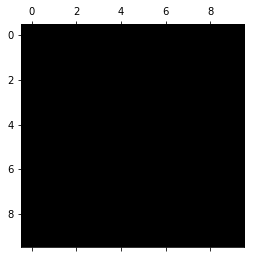

In [63]:
plt.matshow(norm_conf_mx, cmap=plt.cm.gray)


In [77]:
#row represent actual classes
#columns represent predicted classes
#8 and 9 should be really bright because they are confused with other digits

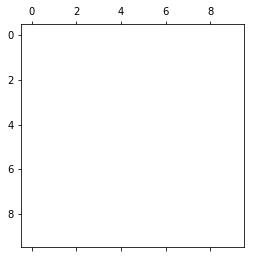

In [65]:
row_sums = conf_mx.sum(axis=1, keepdims=True)
norm_conf_mx = conf_mx / row_sums
np.fill_diagonal(norm_conf_mx, 0)
plt.matshow(norm_conf_mx, cmap=plt.cm.gray_r)
plt.show()

NameError: name 'plot_digits' is not defined

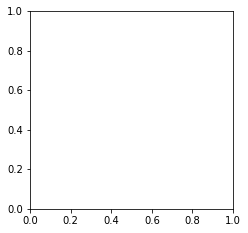

In [64]:
#The problem is that plot_digits is not defined in the text
#later find a similar implementation of plot_digits to show the clusters of classified misclassified from overfitting
#of the SGDClassifier

cl_a, cl_b = 3,5
X_aa = X_train[(y_train == cl_a) & (y_train_pred == cl_a)]
X_ab = X_train[(y_train == cl_a) & (y_train_pred == cl_b)]
X_ba = X_train[(y_train == cl_b) & (y_train_pred == cl_a)]
X_bb = X_train[(y_train == cl_b) & (y_train_pred == cl_b)]

plt.figure(figsize=(8,8))
plt.subplot(221); plot_digits(X_aa[:25], images_per_row=5)
plt.subplot(222); plot_digits(X_ab[:25], images_per_row=5)
plt.subplot(223); plot_digits(X_ba[:25], images_per_row=5)
plt.subplot(224); plot_digits(X_bb[:25], images_per_row=5)
plt.show()

In [66]:
from sklearn.neighbors import KNeighborsClassifier

y_train_large = (y_train >= 7)
y_train_odd = (y_train % 2 == 1)
y_multilabel = np.c_[y_train_large, y_train_odd]

knn_clf = KNeighborsClassifier()
knn_clf.fit(X_train, y_multilabel)

#We are trying to see if the digit 5 is larger than 6 or odd

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')

In [67]:
knn_clf.predict([some_digit])

array([[False,  True]], dtype=bool)

In [68]:
#it is not greater, and it is odd

In [ ]:
#Computes the average score across all labels

#this isnt working anymore for some reason or takes a ridiculus amount of time to calculate

y_train_knn_pred = cross_val_predict(knn_clf, X_train, y_train, cv=3)
f1_score(y_train, y_train_knn_pred, average="weighted")

In [78]:
#This should add noise to the 5 image so that we can clean it later
#This is done by changeing the pixel intensities


#should be random.randint?

import random

noise = random.triangular (0, 100 (len(X_train), 784))
noise = random.triangular (0, 100 (len(X_test), 784))
X_train_mod = X_train + noise
X_test_mod = X_test + noise
y_train_mod = X_train
y_test_mod = X_test

TypeError: 'int' object is not callable

In [ ]:
knn_clf.fit(X_train_mod, y_train_mod)
clean_digit = knn_clf.predict([X_test_mod[some_index]])
plot_digits(clean_digit)